# Multiple Linear Regression in StatsModels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives

You will be able to:

* Perform a multiple linear regression using StatsModels
* Visualize individual predictors within a multiple linear regression
* Interpret multiple linear regression coefficients from raw, un-transformed data

## The Ames Housing Dataset

The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) is a newer (2011) replacement for the classic Boston Housing dataset. Each record represents a residential property sale in Ames, Iowa. It contains many different potential predictors and the target variable is `SalePrice`.

In [5]:
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [6]:
ames.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We will focus specifically on a subset of the overall dataset. These features are:

```
LotArea: Lot size in square feet

1stFlrSF: First Floor square feet

GrLivArea: Above grade (ground) living area square feet
```

In [8]:
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()
ames_subset

,LotArea,1stFlrSF,GrLivArea,SalePrice
Id,,,,
1,8450,856,1710,208500
2,9600,1262,1262,181500
3,11250,920,1786,223500
4,9550,961,1717,140000
5,14260,1145,2198,250000
...,...,...,...,...
1456,7917,953,1647,175000
1457,13175,2073,2073,210000
1458,9042,1188,2340,266500


## Step 1: Visualize Relationships Between Features and Target

For each feature in the subset, create a scatter plot that shows the feature on the x-axis and `SalePrice` on the y-axis.

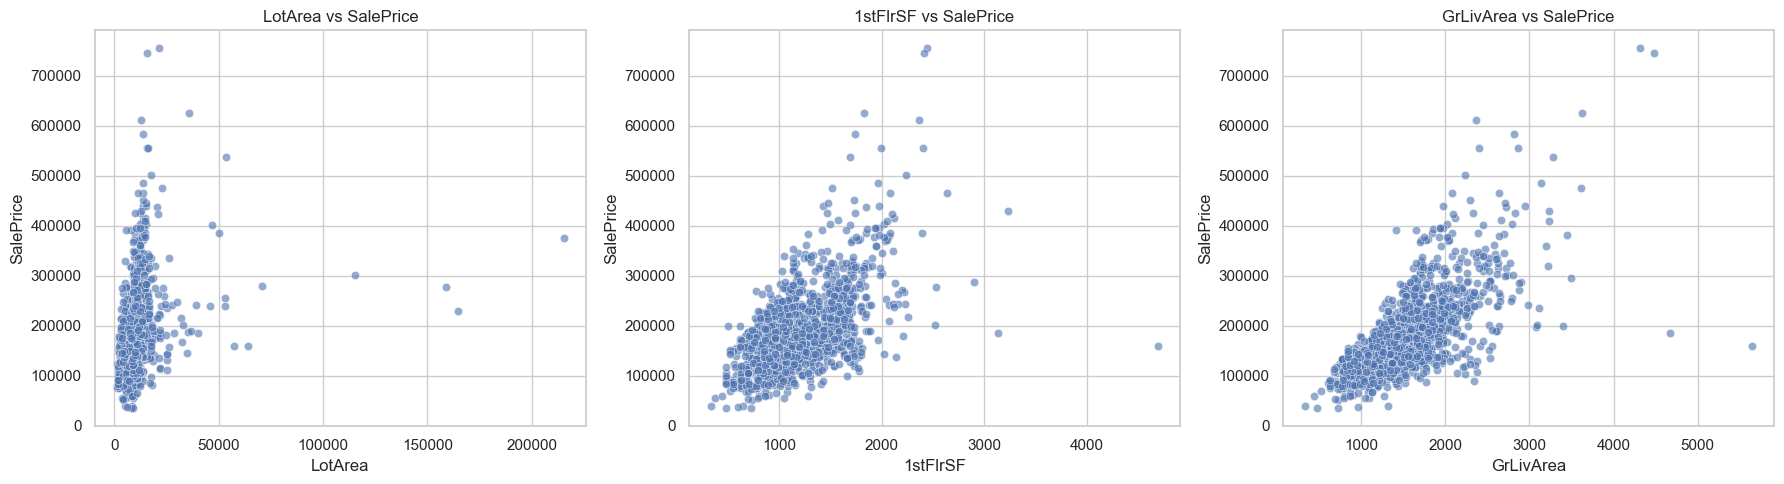

In [10]:
# Your code here - import relevant library, create scatter plots

import matplotlib.pyplot as plt
import seaborn as sns

# Setting plot style
sns.set(style="whitegrid", context="notebook")

# Creating subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: LotArea vs SalePrice
sns.scatterplot(ax=axes[0], data=ames_subset, x='LotArea', y='SalePrice', alpha=0.6)
axes[0].set_title('LotArea vs SalePrice')

# Plot 2: 1stFlrSF vs SalePrice
sns.scatterplot(ax=axes[1], data=ames_subset, x='1stFlrSF', y='SalePrice', alpha=0.6)
axes[1].set_title('1stFlrSF vs SalePrice')

# Plot 3: GrLivArea vs SalePrice
sns.scatterplot(ax=axes[2], data=ames_subset, x='GrLivArea', y='SalePrice', alpha=0.6)
axes[2].set_title('GrLivArea vs SalePrice')

plt.tight_layout()
plt.show()

#### Your written answer here - do these seem like good candidates for linear regression?

Based on the scatter plots GrLivArea and 1stFlrSF appear to be good candidates for linear regression:
  
- **GrLivArea vs SalePrice** shows a strong positive linear relationship, with higher living area correlating with higher sale prices.
- **1stFlrSF vs SalePrice** also shows a positive trend, although slightly weaker and with more spread.
- **LotArea vs SalePrice** is less linear. There are some outliers with extremely large lot sizes that don't proportionally increase SalePrice suggesting non-linear behavior, There's a cluster of data in the lower range, but very large lot areas don’t always correspond with higher prices.

## Step 2: Build a Simple Linear Regression Model

Set the dependent variable (`y`) to be the `SalePrice`, then choose one of the features shown in the subset above to be the baseline independent variable (`X`).

Build a linear regression using StatsModels, describe the overall model performance, and interpret its coefficients.

In [13]:
# Your code here - define y and baseline X

y = ames_subset['SalePrice']
X = ames_subset['GrLivArea']

In [14]:
# Your code here - import StatsModels, fit baseline model, display results

import statsmodels.api as sm

# Adding a constant to X for intercept term
X = sm.add_constant(X)

# Fitting the linear regression model
model = sm.OLS(y, X).fit()

# Results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Thu, 10 Apr 2025   Prob (F-statistic):          4.52e-223
Time:                        18:52:18   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0

### Your written answer here - interpret model results

1. **Overall Model Performance**
- **R-squared = 0.502:** This means that approximately 50.2% of the variability in SalePrice can be explained by GrLivArea alone, a moderately strong explanatory power.
- **F-statistic = 1471, p-value < 0.0001:** This tells us the model is statistically significant overall, that is, GrLivArea is a meaningful predictor of SalePrice.

2. **Coefficient**
- **Intercept (const) ≈ 18,570:** This means when GrLivArea is 0 (which is not realistic in practice), the predicted SalePrice would be approximately $18,570. This is the baseline starting point of the model.
  
- **GrLivArea Coefficient ≈ 107.13:** For every 1 square foot increase in above-ground living area, the sale price increases by about $107.13, on average. The coefficient is statistically significant with a very low p-value (< 0.0001) and a narrow confidence interval.

3. **Residual Analysis & Distribution**
- **Durbin-Watson = 2.025:** Suggests there is no strong autocorrelation in residuals, that is, value close to 2 is ideal.
- **Skew & Kurtosis in JB Test:** Indicates the residuals are not perfectly normally distributed, which might impact model assumptions slightly.

**Conclusion:**
- GrLivArea is a strong and statistically significant predictor of house prices. However, since it explains just over 50% of the variance in sale price, there's room to improve the model by including additional variables e.g. OverallQual, TotalBsmtSF, neighborhood etc.
- The coefficient tells a clear story: larger homes above ground tend to cost more, with each extra square foot adding roughly $107 to the sale price.

## Step 3: Build a Multiple Linear Regression Model

For this model, use **all of** the features in `ames_subset`.

In [17]:
# Your code here - define X

y = ames_subset['SalePrice']
X = ames_subset[['LotArea', '1stFlrSF', 'GrLivArea']]

In [18]:
# Your code here - fit model and display results

# Adding a constant for the intercept
X = sm.add_constant(X)

# Fitting the multiple regression model
model = sm.OLS(y, X).fit()

# Results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     630.3
Date:                Thu, 10 Apr 2025   Prob (F-statistic):          1.57e-262
Time:                        18:52:19   Log-Likelihood:                -17936.
No. Observations:                1460   AIC:                         3.588e+04
Df Residuals:                    1456   BIC:                         3.590e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.431e+04   4776.331     -2.997      0.0

### Your written answer here - interpret model results. Does this model seem better than the previous one?

1. **Model Performance**
- **R-squared - 0.565:** This means that about 56.5% of the variance in SalePrice is explained by the three predictors combined i.e LotArea, 1stFlrSF, and GrLivArea. An improvement from 50.2% in the simple linear regression, so yes, the Multiple Linear Regression Model does seem better.
  
- **Adjusted R-squared - 0.564:** Still strong, adjusted R² didn't drop much, which means the added variables are meaningful.

2. **Coefficient**
- **LotArea	- 0.2841:**	A 1-unit increase in lot area increases sale price by $0.28, holding other features constant. However, this is borderline significant (p = 0.051).

- **1stFlrSF - 60.29:**	For every additional square foot of first-floor space, sale price increases by $60, significant.

- **GrLivArea - 80.61:** A square foot increase in above-ground living area raises price by $80.61, highly significant.

**Conclusion**
- The Multiple Linear Regression Model is statistically stronger than the single-variable model. Most predictors are highly significant, and the model explains more variance in house prices.

## Step 4: Create Partial Regression Plots for Features

Using your model from Step 3, visualize each of the features using partial regression plots.

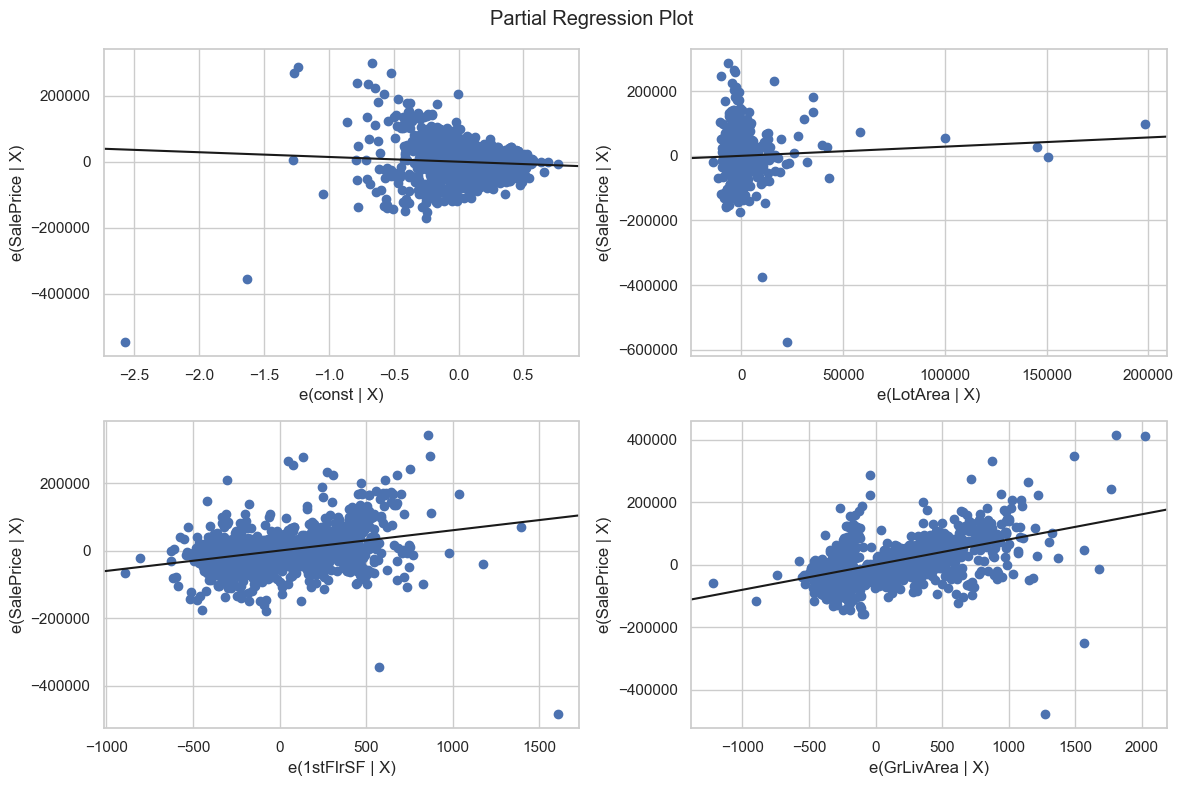

In [21]:
# Your code here - create partial regression plots for each predictor

from statsmodels.graphics.regressionplots import plot_partregress_grid

# Plotting partial regression plots
fig = plt.figure(figsize=(12, 8))
plot_partregress_grid(model, fig=fig)
plt.tight_layout()
plt.show()

### Your written answer here - explain what you see, and how this relates
### to what you saw in Step 1. What do you notice?


1. **GrLivArea (Bottom-right plot):**
- The plot shows a strong, positive linear relationship. Most of the points align closely with the regression line which confirms what we saw in Step 1, where GrLivArea was the strongest single predictor with the highest R-squared of 0.502. GrLivArea continues to be a powerful predictor.

2. **1stFlrSF (Bottom-left plot):**
- The plot shows a positive linear relationship, though with more spread around the line compared to GrLivArea indicating it's still a useful predictor, but not as strong.

3. **LotArea (Top-right plot):**
- This plot shows the relationship is weaker and more scattered. Although the line has a slight positive slope, the points are widely spread and don’t follow the line closely. This means LotArea might not be adding much predictive value when the other variables are included.



## Level Up (Optional)

Re-create this model in scikit-learn, and check if you get the same R-Squared and coefficients.

In [24]:
# Your code here - import linear regression from scikit-learn and create and fit model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Defining X and y
X = ames_subset.drop(columns='SalePrice')
y = ames_subset['SalePrice']

# Creating and fitting the model
linreg = LinearRegression()
linreg.fit(X, y)

# Results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     630.3
Date:                Thu, 10 Apr 2025   Prob (F-statistic):          1.57e-262
Time:                        18:52:20   Log-Likelihood:                -17936.
No. Observations:                1460   AIC:                         3.588e+04
Df Residuals:                    1456   BIC:                         3.590e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.431e+04   4776.331     -2.997      0.0

In [25]:
# Your code here - compare R-Squared

# Predicting and calculating R-squared
y_pred = linreg.predict(X)
r2 = r2_score(y, y_pred)

# Results
print("Scikit-learn R-squared:", r2)
print("Intercept:", linreg.intercept_)
print("Coefficients:", linreg.coef_)

Scikit-learn R-squared: 0.5649801771384368
Intercept: -14313.408857494564
Coefficients: [ 0.28413359 60.28664625 80.60605834]


In [26]:
# Your code here - compare intercept and coefficients

coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linreg.coef_
})
print(coefficients_df)

     Feature  Coefficient
0    LotArea     0.284134
1   1stFlrSF    60.286646
2  GrLivArea    80.606058


## Summary
Congratulations! You fitted your first multiple linear regression model on the Ames Housing data using StatsModels.